In [8]:
# root_dir = "./exp1.csv"
root_dir = "/home/sebastian/codes/ARF_STUFF/arf_paper/outputs/exp2_model_metrics_avg.csv"
exp_name = "exp2"


In [9]:
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
import seaborn as sns

In [10]:
if exp_name == "exp1":
    model_info = {
        'XGBoost Regressor': {'color': "dodgerblue", 'marker': "o"},
        'Random Forest': {'color': "tomato", 'marker': "s"},
        'Linear Regression': {'color': "gold", 'marker': "^"},
        'Ada Boost Regressor': {'color': "mediumseagreen", 'marker': "D"},
        'Decision Tree Regressor': {'color': "lightcoral", 'marker': "p"},
        'MLP Regressor': {'color': "mediumorchid", 'marker': "X"},
        'Random Forest Regressor': {'color': "skyblue", 'marker': "o"},
        'Passive Aggressive Regressor': {'color': "lightpink", 'marker': "s"},
        'K-Neighbors Regressor': {'color': "deepskyblue", 'marker': "^"},
        'SVR': {'color': "limegreen", 'marker': "+"},
        'Linear Regression (LR)': {'color': "salmon", 'marker': "P"},
        'LSTM with Attention': {'color': "orchid", 'marker': "*"},
        'GRU': {'color': "slateblue", 'marker': "v"},
        'BI-LSTM': {'color': "darkorange", 'marker': "d"},
        'LSTM': {'color': "lightseagreen", 'marker': "*"},
        'SGD Regressor': {'color': "violet", 'marker': "h"}
    }
else:
    model_info = {
    'XGBoost Regressor': {'color': "dodgerblue", 'marker': "o"},
    'Ada Boost Regressor': {'color': "mediumseagreen", 'marker': "D"},
    'Passive Aggressive (PA)': {'color': "lightpink", 'marker': "s"},
    'SGD Regressor': {'color': "violet", 'marker': "h"},
    'Adaptive Random Forest (ARF)': {'color': "tomato", 'marker': "s"},
    'Hoeffding Adaptive Tree Regressor': {'color': "gold", 'marker': "^"},
    'Hoeffding Tree Regressor': {'color': "skyblue", 'marker': "o"},
    'SRP Regressor': {'color': "deepskyblue", 'marker': "^"},
    'MLP partialfit': {'color': "mediumorchid", 'marker': "X"}
    }


In [11]:
df = pd.read_csv(root_dir,index_col=False)
df

,Model,Window Size,MAE_mean,MAE_std,RMSE_mean,RMSE_std,SMAPE_mean,SMAPE_std,r2_mean,r2_std,MASE_mean,MASE_std,Training Time,Inference Time,Model memory (MB)
0,Adaptive Random Forest (ARF),6,3.167,0.076,8.475,0.160,19.294,0.279,0.921,0.003,0.818,0.020,36765.313,12135.261,4035.426
1,Adaptive Random Forest (ARF),8,2.917,0.143,8.176,0.218,18.198,0.634,0.926,0.004,0.754,0.037,10985.082,2104.979,4049.356
2,Adaptive Random Forest (ARF),9,2.841,0.240,8.271,0.325,17.102,1.128,0.924,0.006,0.734,0.062,1403.575,394.632,1453.863
3,Adaptive Random Forest (ARF),12,2.594,0.238,7.772,0.327,16.594,1.104,0.933,0.006,0.670,0.061,930.893,267.114,4088.650
4,Adaptive Random Forest (ARF),20,2.114,0.413,7.172,0.532,14.006,2.159,0.943,0.009,0.546,0.107,1267.728,261.401,4142.016
5,Adaptive Random Forest (ARF),32,1.760,0.515,6.658,0.721,12.232,2.774,0.951,0.011,0.454,0.133,2363.090,386.467,4225.895
6,Adaptive Random Forest (ARF),64,1.276,0.675,5.092,1.411,9.951,3.479,0.969,0.017,0.330,0.174,5991.680,1170.914,4367.824
7,Hoeffding Adaptive Tree Regressor,6,3.838,0.711,24.027,65.853,21.783,0.716,-4.189,22.777,0.992,0.184,1294.042,291.991,304.292
8,Hoeffding Adaptive Tree Regressor,8,3.882,0.668,25.723,60.047,21.917,0.472,-3.514,18.886,1.003,0.173,806.718,187.705,273.816
9,Hoeffding Adaptive Tree Regressor,9,3.704,0.201,9.415,0.281,21.752,0.669,0.902,0.006,0.957,0.052,17.874,6.295,27.802


In [12]:
df.Model.unique()

array(['Adaptive Random Forest (ARF)',
       'Hoeffding Adaptive Tree Regressor', 'Hoeffding Tree Regressor',
       'MLP partialfit', 'Passive Aggressive (PA)', 'SGD Regressor',
       'SRP Regressor'], dtype=object)

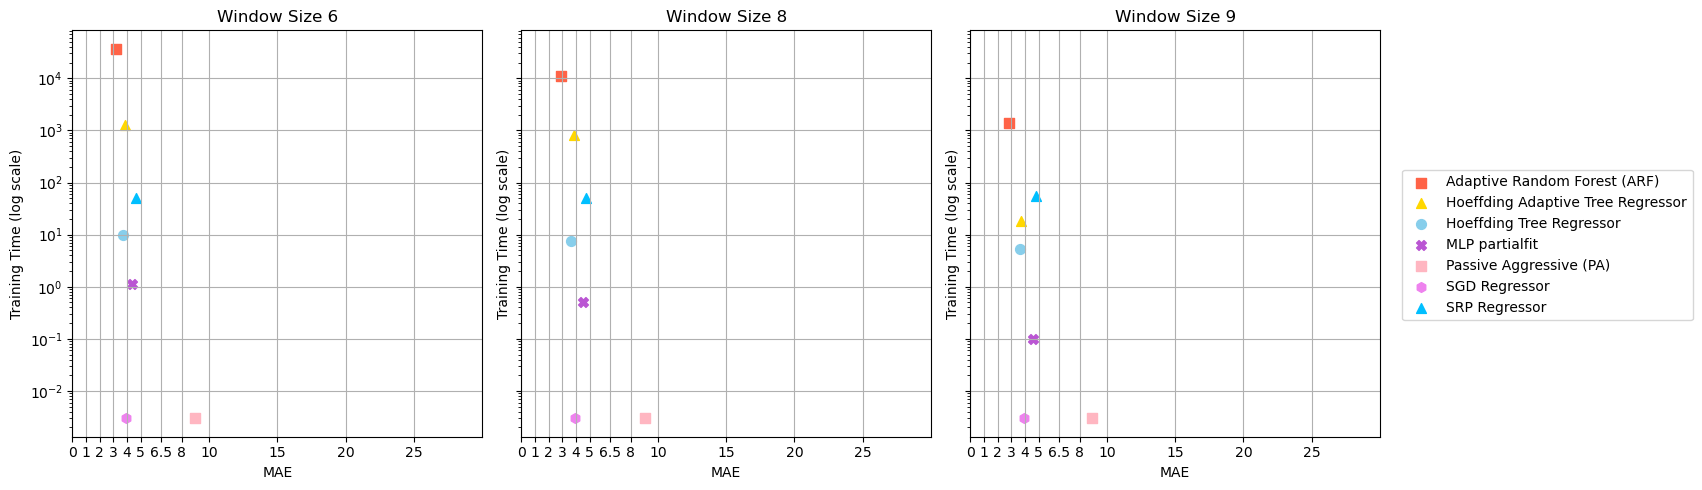

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.legend_handler import HandlerBase

def plot_and_save(df_local, column_name,exp_name):
    fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True) 

    plt.subplots_adjust(hspace=0.5)  

    class MarkerHandler(HandlerBase):
        def create_artists(self, legend, tup, xdescent, ydescent,
                           width, height, fontsize, trans):
            return [tup]

    scatter_handles = {} 

    for i, (col, ax) in enumerate(zip(df_local["Window Size"], axs.flatten())):

        df_temp = df[df['Window Size'] == col].reset_index(drop=True)
        categories = np.random.choice(len(model_info), len(df_temp))
        for index, row in df_temp.iterrows():
            model_info_entry = model_info[row['Model']]
            color = model_info_entry['color']
            marker = model_info_entry['marker']

            handle = ax.scatter(row['MAE_mean'], row[column_name], color=color, marker=marker, label=row['Model'], s=50)
            if i == 0:
                scatter_handles[row['Model']] = handle

        ax.set_title(f"Window Size {col}") 
        ax.set_yscale('log') 
        ax.set_xlabel('MAE')
        ax.set_ylabel(f'{column_name} (log scale)')

        x = [0, 1, 2, 3, 4, 5, 6.5, 8, 10, 15, 20, 25]
        ax.set_xticks(x)
        ax.set_xticklabels(x)
        ax.set_xlim([0, 30])
        ax.grid(True)  

    plt.subplots_adjust(right=0.85) 

    fig.legend(handles=scatter_handles.values(), labels=scatter_handles.keys(), loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, handler_map={plt.scatter: MarkerHandler()})
    plt.tight_layout()
    
    viz_folder = f"images/"
    os.makedirs(viz_folder, exist_ok=True)
    plt.savefig(f"images/{column_name}_plot_{exp_name}.pdf", bbox_inches='tight', dpi=300)  

plot_and_save(df, "Training Time", exp_name)

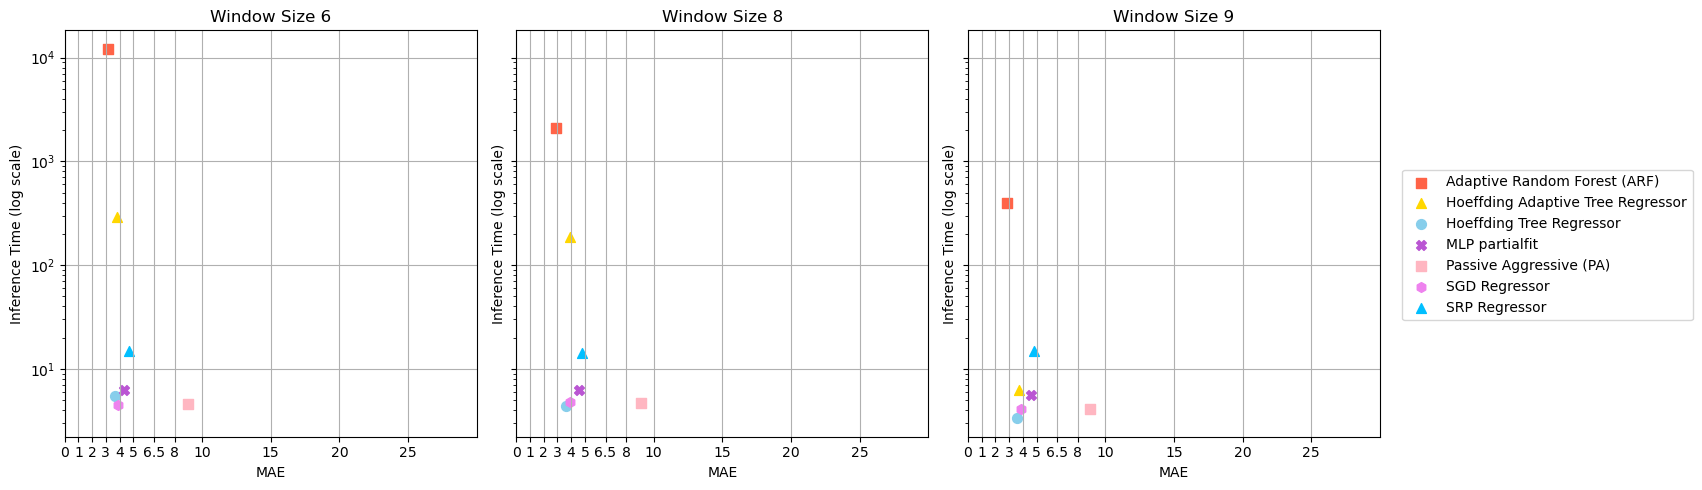

In [16]:
plot_and_save(df, "Inference Time",exp_name)

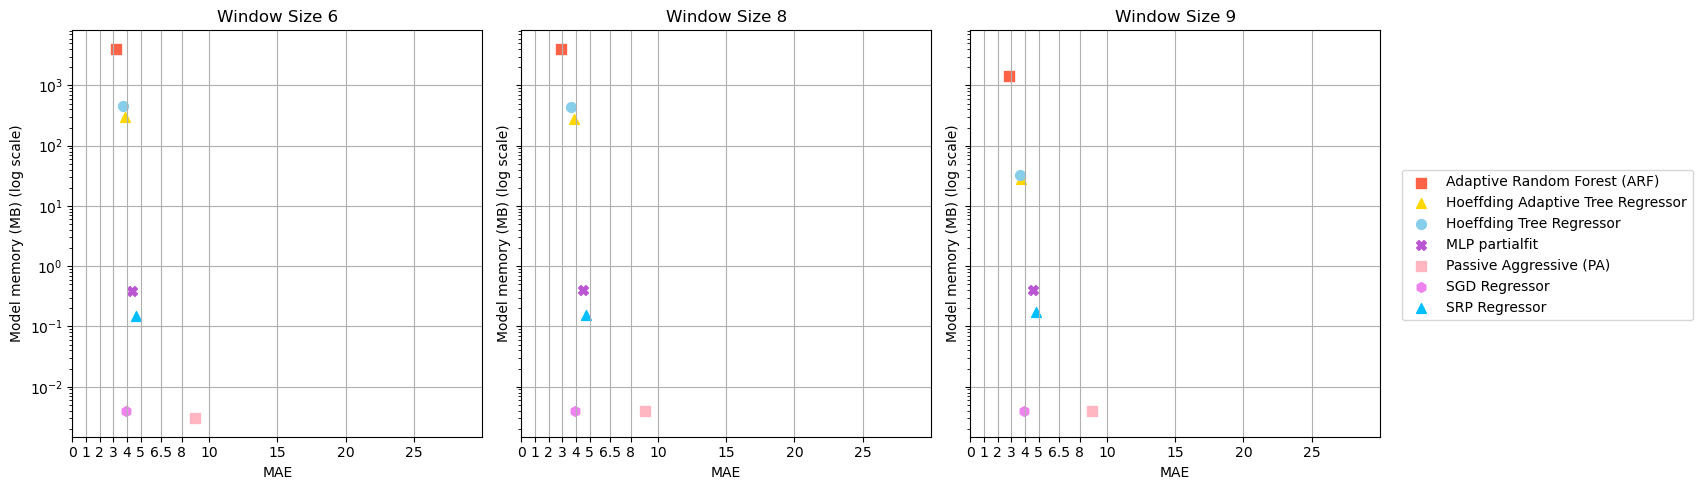

In [17]:
plot_and_save(df, "Model memory (MB)",exp_name)